## 1st Word Cleaning

In [242]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter
import ssl
import seaborn as sns
import matplotlib.pyplot as plt
import unidecode

# SSL fix for NLTK downloads
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your CSV
input_dataframe = pd.read_csv("Combined_RealNews.csv", index_col=0)


# Grab text and class info
text_list = input_dataframe["Text"].astype(str).tolist()
#code_list = input_dataframe["class"].tolist()

# Define tools
stopwords_list = set(stopwords.words('english'))
stopwords_list.add('said')      #ADDED THIS LINE TO CLEAN UNIGRAM 
stopwords_list.add("year")  
stopwords_list.add('u') 
stopwords_list.add('think') 
stopwords_list.add('two')
stopwords_list.add('get') 
stopwords_list.add('side') 
stopwords_list.add('cdc')
stopwords_list.add('united')
stopwords_list.add('state')


lemmatizer = WordNetLemmatizer()

# Contractions map
CONTRACTION_MAP = {
    "ain't": "is not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
    "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
    "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",
    "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he he will have", "he's": "he is",
    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would",
    "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have",
    "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
    "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
    "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
    "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
    "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not",
    "shouldn't've": "should not have", "so've": "so have", "so's": "so as", "that'd": "that would", "that'd've": "that would have",
    "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "they'd": "they would",
    "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
    "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
    "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
    "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
    "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will",
    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have",
    "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not",
    "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have",
    "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
    "you'll've": "you will have", "you're": "you are", "you've": "you have"
}

# Clean and preprocess
cleantext = []

for raw_text in text_list:
    # Lowercase
    text = raw_text.lower()
    
    # Expand contractions
    text = " ".join([CONTRACTION_MAP.get(w, w) for w in text.split()])
    
    # Remove special characters and URLs
    text = re.sub(r"http\S+|www\S+|https\S+|\ [A-Za-z]*\.com", '', text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    
    # Normalize accents
    text = unidecode.unidecode(text)
    
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    
    # Tokenize, remove stopwords, lemmatize
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords_list]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    cleantext.append(" ".join(tokens))

# Final output
output = {"CleanText": cleantext}
results = pd.DataFrame(output)
results.to_csv("Cleaned1_RealNews.csv", index=True, index_label="Index", encoding="utf-8-sig")

print("done")


done


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ceren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ceren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ceren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## N-Grams

Unigram: ['vaccine', 'study', 'covid', 'autism', 'people', 'measles', 'child', 'safety', 'state', 'kennedy']
Bigram: ['covid vaccine', 'vaccine autism', 'vaccination rate', 'vaccine safety', 'infectious disease', 'center disease', 'disease control', 'cause autism', 'mrna vaccine', 'measles outbreak']
Trigram: ['center disease control', 'health human service', 'disease control prevention', 'vaccine safety datalink', 'food drug administration', 'department health human', 'study vaccine autism', 'vaccine cause autism', 'link vaccine autism', 'infectious disease specialist']


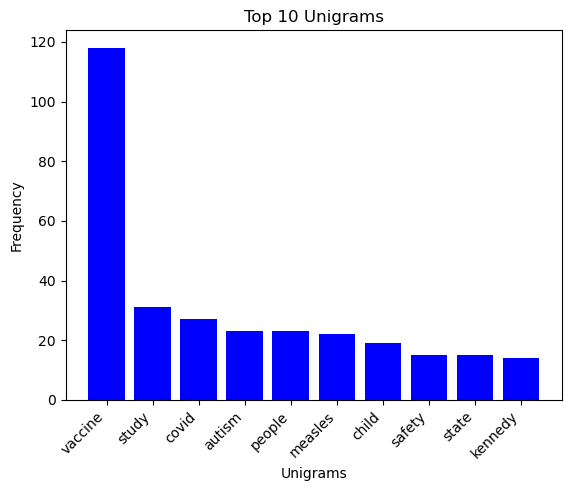

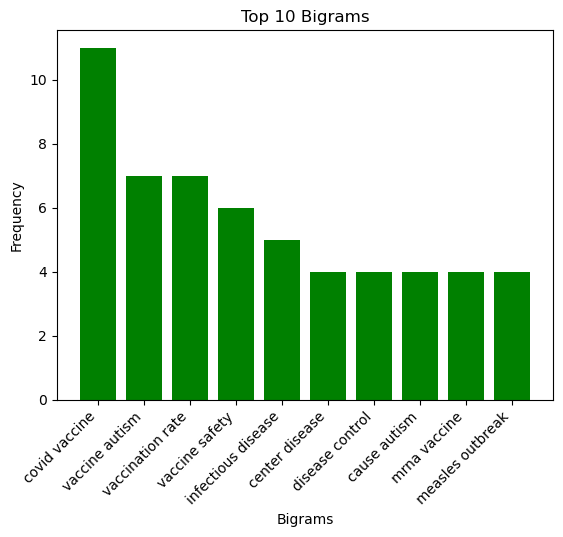

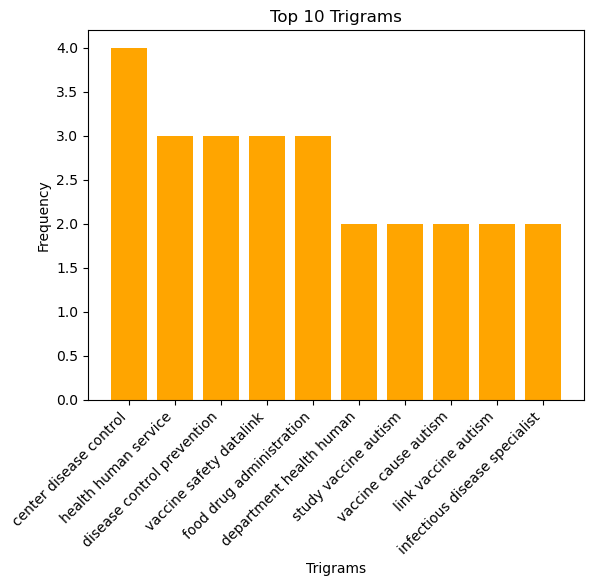

In [245]:
df = pd.read_csv("Cleaned1_RealNews.csv")

# Combine all cleaned text into a single string
cleaned_text = " ".join(df["CleanText"].dropna().astype(str).tolist())

# Tokenize
tokens = word_tokenize(cleaned_text)

# Generate N-grams
unigrams = ngrams(tokens, 1)
bigrams = ngrams(tokens, 2)
trigrams = ngrams(tokens, 3)

# Count N-grams
mostcommonunigrams = Counter(unigrams).most_common(10)
unigram_list = [unigram[0][0] for unigram in mostcommonunigrams]
print("Unigram:",unigram_list)

mostcommonbigrams = Counter(bigrams).most_common(10)
bigram_list = [' '.join(bigram[0]) for bigram in mostcommonbigrams]
print("Bigram:",bigram_list)

mostcommontrigrams = Counter(trigrams).most_common(10)
trigram_list = [' '.join(trigram[0]) for trigram in mostcommontrigrams]
print("Trigram:",trigram_list)

# ----------- Plot Top 10 Unigrams --------------
top10unigrams_keys = [unigram[0][0] for unigram in mostcommonunigrams]
top10unigrams_values = [unigram[1] for unigram in mostcommonunigrams]

plt.bar(top10unigrams_keys, top10unigrams_values, color="blue")
plt.title("Top 10 Unigrams")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

# ----------- Plot Top 10 Bigrams --------------
top10biggrams_keys = [' '.join(bigram[0]) for bigram in mostcommonbigrams]
top10biggrams_values = [bigram[1] for bigram in mostcommonbigrams]

plt.bar(top10biggrams_keys, top10biggrams_values, color="green")
plt.title("Top 10 Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

# ----------- Plot Top 10 Trigrams --------------
top10trigrams_keys = [' '.join(trigram[0]) for trigram in mostcommontrigrams]
top10trigrams_values = [trigram[1] for trigram in mostcommontrigrams]

plt.bar(top10trigrams_keys, top10trigrams_values, color="orange")
plt.title("Top 10 Trigrams")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

## REAL NEWS WORD CLOUD

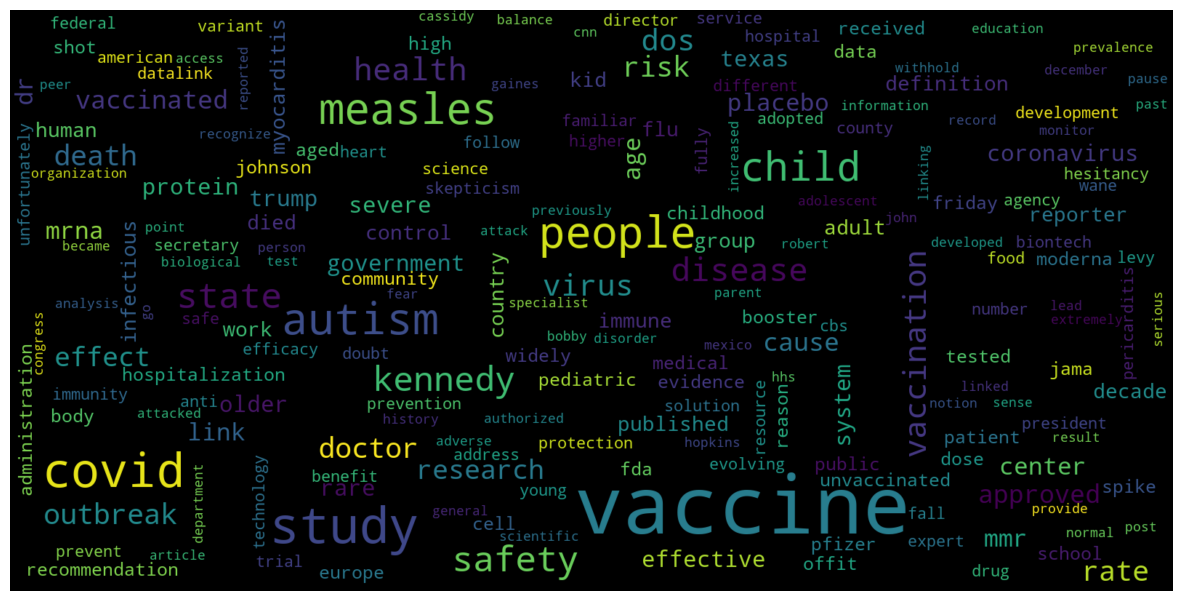

done


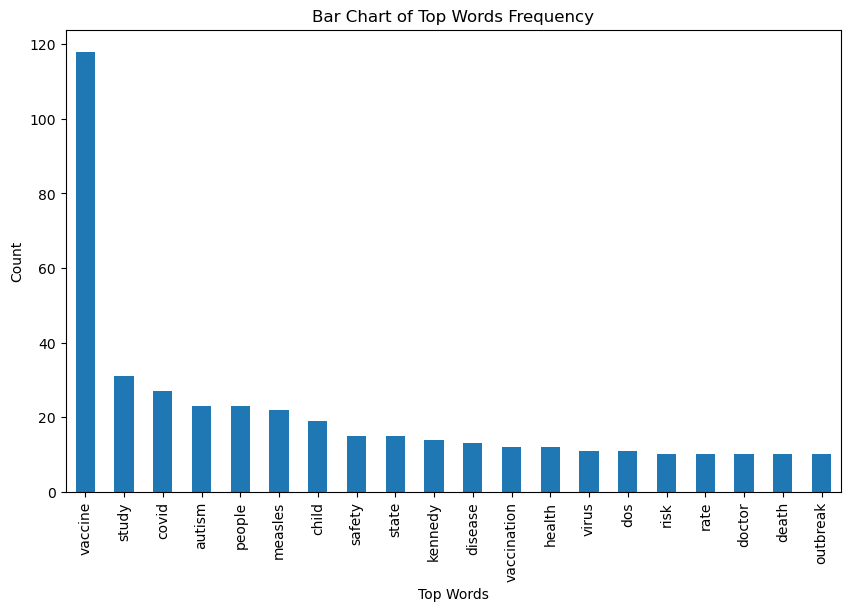

In [250]:
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 


#I am creating an empty dictionary here
inputdata = {}
#header is my first row in the csv file that is why hesder is 0 below
inputdata = pandas.read_csv('Cleaned1_RealNews.csv', header=[0], index_col=0).to_dict()

#we can use type to check the data type of input data variable
#print(type(inputdata))

#I created a new dictionaru below for the Text column in the csv file
textdictionary = inputdata.get("CleanText")

#I am converting dictionary to a list so I can analyze the data
textlist = list(textdictionary.values())



stopwords = [
     "u", "one", "even", "know", "see", "something", "make", "let", "say", "going", "many", "really", "way", "like", 
     "need", "fact", "however", "remember", "kind", "told", "looking", "statement", "question", "issue", "long", 
     "thing", "though", "every", "actually", "look", "put", "help", "also", "made", "already", "matter", "want", 
     "done", "still", "seeing", "never", "keep", "instead", "according", "used", "show", "found", "could", "would", 
     "may", "well", "less", "since", "last", "back", "part", "best", "better", "either", "away", "around", "least",
     "across", "showed", "see", "look", "back", "kind", "thing", "make", "one", "way", "last", "done", "well", "issue",
     "know", "say", "lot", "long", "many", "really", "almost", "may", "like", "keep", "help", "every", "still", "fact", 
     "already", "important", "something", "figure", "gotten", "even", "told", "statement", "looking", "change", "matter",
     "show", "spoke", "tell","false", "despite", "known", "part", "made","every","even","thing","done","look","tell","suggest",
     "good", "find", "large", "taken","jr","share","exactly","right", "including","thanks","late", "share", "would", "already"
     "one", "two", "three", "five", "new", "know", "say", "says", "said", "let", "may", "could", "still", "may", "could",
     "would", "also", "still", "even", "way", "want", "really", "kind", "thing", "make", "see","expect","brought","especially",
     "well", "put", "lot", "look", "first", "last", "since", "back", "many", "like", "get", "done","relayed","happen",
     "time", "year", "day", "month", "news", "best", "every", "keep", "though", "ask", "asked", "related", "instance", "post"
     "told", "think", "good", "find", "need", "use", "using", "already", "always", "look", "good","unfortunately"
     "often", "recent", "recently", "according", "based", "among", "around", "however", "instead","morning","sense"
     "because", "although", "might", "never", "anything", "something", "nothing", "show", "shown","singer","point"
     "provide", "provided", "example", "case", "see", "seen", "yet", "another", "much", "more","talked",
     "less", "few", "any", "some", "most", "anyone", "everyone", "someone", "nobody", "nobody","f", "jr",
      "whose", "which", "while", "without", "within" ,"use", "get", "need", "known", "lot", "back","million"

]

for word in stopwords:
    textlist = [re.sub(rf"\b{word}\b", "", text) for text in textlist]

# Apply the cleaning
import re
textlist


#Draw a word cloud diagram to verify the input data
consolidated = ' '.join(
    word for word in textlist)
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

#Draw a bar chart demonstrating top 20 words from the cleaned text for verification 
vec = CountVectorizer().fit(textlist) 
bag_of_words = vec.transform(textlist) 
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] 
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True) 
    
common_words = words_freq[:20] 

topwordsdataframe = pandas.DataFrame(common_words, columns=['Review', 'count']) 
  
topwordsdataframe.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
    kind='bar', 
    figsize=(10, 6), 
    xlabel="Top Words", 
    ylabel="Count", 
    title="Bar Chart of Top Words Frequency"
) 

output = {"CleanText": textlist}
# Save results to a csv file
results = pandas.DataFrame(output)
results.to_csv('Cleaned2_RealNews.csv', index=True, index_label="Index", encoding="utf-8-sig")

print("done")


__I kept some common words like _study, adverse, rate, linked, cause, and older..etc_ because they are important in the context of COVID, vaccines, health, and politics.These terms carry important value in the context of COVID, vaccines, health, and politics, and help maintain the accuracy and relevance of the analysis.__

In [199]:
import pandas as pd
from collections import Counter
import re

# Load cleaned text
df = pd.read_csv('Cleaned2_RealNews.csv', index_col=0)

# Combine all cleaned text into one string
all_text = ' '.join(df['CleanText'].dropna().tolist())

# Tokenize and normalize
words = re.findall(r'\b[a-z]+\b', all_text.lower())

# Count word frequencies
word_counts = Counter(words)

# Print top 300 most common words
print("Top 200 Most Frequent Words:\n")
for word, count in word_counts.most_common(200):
    print(f"{word}: {count}")

Top 200 Most Frequent Words:

vaccine: 118
study: 31
covid: 27
autism: 23
people: 23
measles: 22
child: 19
state: 17
safety: 15
cdc: 14
kennedy: 14
disease: 13
health: 12
vaccination: 12
virus: 11
dos: 11
risk: 10
rate: 10
doctor: 10
united: 10
million: 10
outbreak: 10
death: 10
research: 9
effect: 9
cause: 8
vaccinated: 8
approved: 8
center: 7
link: 7
dr: 7
mrna: 7
side: 7
mmr: 7
placebo: 7
age: 7
rare: 6
trump: 6
system: 6
government: 6
effective: 6
texas: 6
older: 6
severe: 6
coronavirus: 6
protein: 6
human: 5
control: 5
published: 5
country: 5
decade: 5
infectious: 5
died: 5
work: 5
myocarditis: 5
adult: 5
group: 5
definition: 5
kid: 5
flu: 5
immune: 5
reporter: 5
evidence: 4
friday: 4
high: 4
data: 4
widely: 4
johnson: 4
public: 4
tested: 4
administration: 4
medical: 4
offit: 4
cell: 4
fda: 4
community: 4
childhood: 4
school: 4
recommendation: 4
reason: 4
unvaccinated: 4
europe: 4
shot: 4
aged: 4
pfizer: 4
moderna: 4
jama: 4
received: 4
hospitalization: 4
booster: 4
body: 4
spike: